# Synthetic Controls: A review

Just as personal review of the process, I will try to make sense of the original Synthetic Control algorithm and of the correction and improvements made by the original author.

Synthetic Control Methods (SCM onwards) is a technique developed to test counterfactuals when there is only information about past observations. The cannonical use case is when, for example, a region-spaning event (natural event, policy, bill, etc) affects one region, while leaving the neighbouring/equivalent region unaffected, and the research would like to estimate the effect of this event over some variable of interest, in comparison with the regions that were not affected, in order to infer causality.

The above implies some rather obvious but still important conditions. First we must have measuments over time of the variable of interest, and this measurements must be equivalent. Second, the units must be comparable. Third, the event must be valid for all the units. This last point is less obvious when the unit is an aggregate of many individuals, but when the unit are individuals (as we will see later) some events are not valid for some units, and hence comparisons between them might not be useful.

In order to undertand this better, I will run a simple exmaple using simulated data. Below I'm simulating the trayectory of a random variable $y$ for a set $\textbf{c}$ of 20 units $\mathcal{i}$, over a period $S$ of 100 time-steps $s$. The simulation was carried out by a simple stochastic process:
$$
y_{i_{s}} = y_{i_{s - 1}} + \mathcal{N}(0,1)
$$

Where:
$$
y_{i_{0}} = \mathcal{Gamma}(2,2)
$$

In [35]:
import random
import math
import pandas as pd
import matplotlib.pyplot as plt

In [111]:
steps = 100
X = list(range(1,steps))
c = []
for i in range(0, 20):
    y = []
    py = random.gammavariate(2, 2)
    for x in X:
        yi = py + random.gauss(0, 1)
        py = yi
        y.append(yi)
    c.append(y)
df = pd.DataFrame(c).T
df.columns = [f'c{x}' for x in range(1, 21)]

Additionally, I'm simulating a treated unit $T$ measured over the same period $S$ of 100 time-steps $s$, but giving it a discontinuity at step 50th, as follows:
$$
y_{T_{s}} =
\begin{cases}
      y_{T_{s - 1}} + \mathcal{N}(0,1) & \text{if } i \leq 50 \\
      y_{T_{s - 1}} - \mathcal{Gamma}(1,1) & \text{if } i > 50
\end{cases}
$$

Up until the 50th step the random walk should be fairly flat, but from 51th onwards, I'm a subtracting an always positve random number, representing a stark change in the trend. 

In [116]:
steps = 100
X = list(range(1,steps))
t = []
py = 0
for i, x in enumerate(X):
    if i <= 50:
        yi = py + random.gauss(0, 1)
        py = yi
    else:
        yi = py - random.gammavariate(1,1)
        py = yi
    t.append(yi)
T = pd.Series(t)
df['t'] = T

As it can seen below, the treated unit is very similar, alotugh slighly below the mean to the other up to the 50th step where it starts to decrease. This point will represent the event in our simulated data.

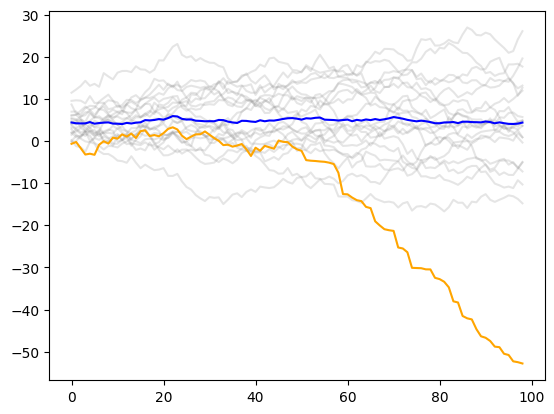

In [123]:
plt.figure()
for column in df.drop('t', axis=1):
    plt.plot(df[column], color='grey', alpha=.2)
# highlight treated unit
plt.plot(df['t'], color='orange')
plt.plot(df.drop('t', axis=1).mean(axis=1), color='blue')

looking at the above plot its very obvious that our treament had an efect in the variable, but this data datasets its just to ilustrate the inner workings of the technique.